# Unsepervised Machine Learning: Clustering

## Contents

### Import libraries and data

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pylab as pl

In [4]:
%matplotlib inline

In [5]:
path = 'C:/Users/rlink/Minimum Wage/02 data'

In [6]:
df = pd.read_csv(os.path.join(path, 'Minimum Wage Data 01.csv'))

In [11]:
df.shape

(2862, 15)

In [13]:
df.columns

Index(['Year', 'State', 'State.Minimum.Wage',
       'State.Minimum.Wage.2020.Dollars', 'Federal.Minimum.Wage',
       'Federal.Minimum.Wage.2020.Dollars', 'Effective.Minimum.Wage',
       'Effective.Minimum.Wage.2020.Dollars', 'CPI.Average',
       'Department.Of.Labor.Uncleaned.Data',
       'Department.Of.Labor.Cleaned.Low.Value',
       'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars',
       'Department.Of.Labor.Cleaned.High.Value',
       'Department.Of.Labor.Cleaned.High.Value.2020.Dollars', 'Footnote'],
      dtype='object')

In [15]:
df.head()

,Year,State,State.Minimum.Wage,State.Minimum.Wage.2020.Dollars,Federal.Minimum.Wage,Federal.Minimum.Wage.2020.Dollars,Effective.Minimum.Wage,Effective.Minimum.Wage.2020.Dollars,CPI.Average,Department.Of.Labor.Uncleaned.Data,Department.Of.Labor.Cleaned.Low.Value,Department.Of.Labor.Cleaned.Low.Value.2020.Dollars,Department.Of.Labor.Cleaned.High.Value,Department.Of.Labor.Cleaned.High.Value.2020.Dollars,Footnote
0,1968,Alabama,0.00000,0.00,1.15,8.55,1.15,8.55,34.8,...,0.00000,0.00,0.00000,0.00,NaN
1,1968,Alaska,2.10000,15.61,1.15,8.55,2.10,15.61,34.8,2.1,2.10000,15.61,2.10000,15.61,NaN
2,1968,Arizona,0.46800,3.48,1.15,8.55,1.15,8.55,34.8,18.72 - 26.40/wk(b),0.46800,3.48,0.66000,4.91,(b)
3,1968,Arkansas,0.15625,1.16,1.15,8.55,1.15,8.55,34.8,1.25/day(b),0.15625,1.16,0.15625,1.16,(b)
4,1968,California,1.65000,12.26,1.15,8.55,1.65,12.26,34.8,1.65(b),1.65000,12.26,1.65000,12.26,(b)


In [17]:
df.rename(columns = {'State.Minimum.Wage' : 'st min wage', 'State.Minimum.Wage.2020.Dollars': 'st min wage 2020', 'Federal.Minimum.Wage': 'fed min wage', 'Federal.Minimum.Wage.2020.Dollars': 'fed min wage 2020', 'Effective.Minimum.Wage': 'eff min wage', 'Effective.Minimum.Wage.2020.Dollars' : 'eff min wage 2020', 'CPI.Average' : 'cpi ave', 'Department.Of.Labor.Uncleaned.Data' : 'DoL uncleaned data', 'Department.Of.Labor.Cleaned.Low.Value' : 'DoL cleaned low', 'Department.Of.Labor.Cleaned.Low.Value.2020.Dollars' : 'DoL cleaned low 2020', 'Department.Of.Labor.Cleaned.High.Value' : 'DoL cleaned high', 'Department.Of.Labor.Cleaned.High.Value.2020.Dollars' : 'DoL cleaned high 2020'}, inplace = True)

In [19]:
df.columns

Index(['Year', 'State', 'st min wage', 'st min wage 2020', 'fed min wage',
       'fed min wage 2020', 'eff min wage', 'eff min wage 2020', 'cpi ave',
       'DoL uncleaned data', 'DoL cleaned low', 'DoL cleaned low 2020',
       'DoL cleaned high', 'DoL cleaned high 2020', 'Footnote'],
      dtype='object')

## Elbow technique

In [22]:
var_inc = ['eff min wage', 'cpi ave']

In [24]:
df_sub = df[var_inc]

In [26]:
df_sub.shape

(2862, 2)

In [28]:
### Standardize data

In [30]:
std_scaler = StandardScaler()
df_scaled = std_scaler.fit_transform(df_sub)

In [32]:
num_cl = range(1, 10)
kmeans = [KMeans(n_clusters=i) for i in num_cl]

In [34]:
score = [kmeans[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans))]

In [36]:
score

[-5723.999999999994,
 -1685.357326747051,
 -806.6907645485973,
 -447.43457354742895,
 -359.33291633350467,
 -208.83665534544843,
 -177.6669257131411,
 -151.26675357024084,
 -125.44566320822688]

### Plot the elbow curve using PyLab.

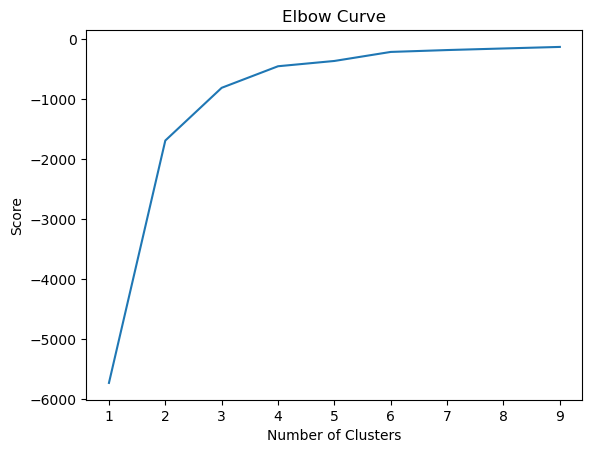

In [39]:
pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

Based on this chart I believe that the optimal number of clusters is 3. While there is some flattening at 2, I think that four is a better number to use because the flattening is significantly more pronounced.

In [121]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
kmeans = KMeans(n_clusters=5, random_state=42)
silhouette_score(df_scaled, kmeans.fit_predict(df_scaled))

0.622520408280052

#### I ran the silhouette algaorithm for 2 -6 clusters. The coefficient for 3 (0.47059) is the closest to 1, even though it is not very close. Therefore, I conclude that it is the optimum number of clusters to examine.

### Create the k-means object

In [123]:
kmeans = KMeans(n_clusters = 5) 

### Fit the k-means object to the data

In [126]:
kmeans.fit(df_scaled)

KMeans(n_clusters=5)

In [128]:
kmeans = KMeans(n_clusters=5, random_state=None, n_init=10)

In [130]:
# Add the cluster labels to the original dataframe and to the subset
df['Cluster'] = kmeans.fit_predict(df_scaled)
df_sub['Cluster'] = kmeans.fit_predict(df_scaled)

C:\Users\rlink\AppData\Local\Temp\ipykernel_22900\1305691014.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['Cluster'] = kmeans.fit_predict(df_scaled)


In [132]:
# Verify cluster assignment
print(df_sub.head())

   eff min wage  cpi ave  Cluster  clusters cluster
0          1.15     34.8        4         0    pink
1          2.10     34.8        4         0    pink
2          1.15     34.8        4         0    pink
3          1.15     34.8        4         0    pink
4          1.65     34.8        4         0    pink


In [134]:
df_sub['clusters'] = kmeans.fit_predict(df_scaled)

C:\Users\rlink\AppData\Local\Temp\ipykernel_22900\1811275590.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['clusters'] = kmeans.fit_predict(df_scaled)


### Plot the clusters for the "eff min wage" and the "cpi ave" variables

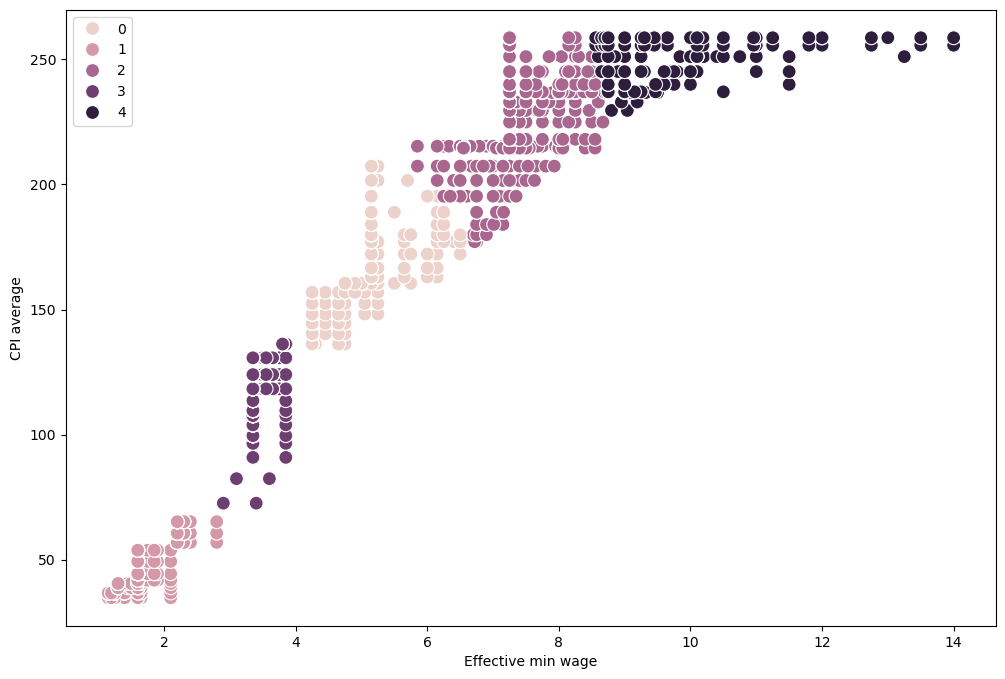

In [137]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_sub['eff min wage'], y=df_sub['cpi ave'], hue=kmeans.labels_, s=100) 

ax.grid(False)
plt.xlabel('Effective min wage') # Label x-axis.
plt.ylabel('CPI average') # Label y-axis.
plt.show()

In [139]:
df_sub.loc[df_sub['clusters'] == 2, 'cluster'] = 'black'
df_sub.loc[df_sub['clusters'] == 1, 'cluster'] = 'purple'
df_sub.loc[df_sub['clusters'] == 0, 'cluster'] = 'pink'

In [141]:
df_sub.groupby('cluster').agg({'eff min wage':['mean', 'median'], 
                          'cpi ave':['mean', 'median']})

eff min wage            cpi ave         
                mean median        mean   median
cluster                                         
black       7.740180   7.25  231.731409  232.957
pink        4.218832   4.25  139.974740  144.500
purple      1.982195   1.60   60.924788   49.300

## How and why the clusters make sense

I ran the silhouette algorithm and determined that the best fit for the number of clusters is 5.

The clusters show that nominal minimum wage does in fact increase proportionally with CPI.

In many states, there is no mandated minimum wage, or it was legislated at a later date. This affects the kmeans algorythm. 

My conclusion is that while there may be other factors that explain changes in the minimum wage, inflation is highly correlated.

It would be good to explore other factors to determine why minimum wages change over time. Some ideas are political: election years, which party has majorities in legislatures, which party the executive belongs to. Other ideas may be econimic: unemployment rate, housing prices, food and/or other staples prices.